In [33]:
import matplotlib.pyplot as plt
import scipy.io as sp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# from functions import *

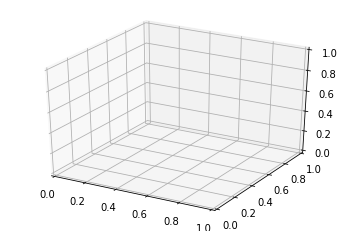

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

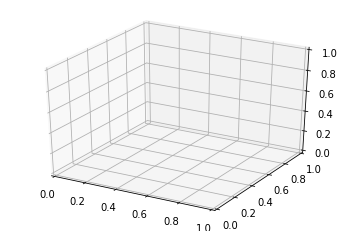

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [30]:
elctrode, matrix, cat_lab = load_data('S1.mat')

dict_keys(['__header__', '__version__', '__globals__', 'sub', 'Fs', 'N', 'T', 'exemplarLabels', 'categoryLabels', 'X_2D', 'X_3D'])


In [31]:
z = elctrode[0]

In [32]:
z.shape

(124, 32)

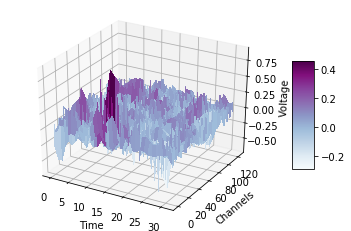

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 32, 1)
Y = np.arange(0, 124, 1)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = z #np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.BuPu,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
ax.set_xlabel('Time')
ax.set_ylabel('Channels')
ax.set_zlabel('Voltage')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [2]:
acc_main = np.load('acc_main_binary.npy')

In [3]:
acc_main_mean = np.mean(acc_main)
acc_main_err = np.std(acc_main)
acc_main_mean, acc_main_err

(0.7619580924855491, 0.029907294817270145)

In [4]:
acc_augment = np.load('acc_augment_binary.npy')
acc_augment = acc_augment.transpose(2,1,0)

In [5]:
acc_augment_list = acc_augment.tolist()
acc_augment_new = [[],[]]
acc_augment_new[0].append(acc_main)
acc_augment_new[0].extend(acc_augment_list[0])
acc_augment_new[1].append(acc_main)
acc_augment_new[1].extend(acc_augment_list[1])

acc_augment_new = np.array(acc_augment_new)

In [6]:
acc_augment_new.shape

(2, 5, 10)

In [7]:
acc_augment = acc_augment_new
acc_augment = np.array(acc_augment)
acc_augment.sort()
acc_augment.shape

(2, 5, 10)

In [8]:
acc_augment_mean = (np.mean(acc_augment, axis = 2)).T
acc_augment_err = (np.std(acc_augment, axis = 2)).T

In [9]:
acc_augment_mean.shape , acc_augment_err.shape

((5, 2), (5, 2))

In [10]:
acc_with_repl = []
#acc_with_repl.append(acc_main_mean)
acc_with_repl.extend([i[0] for i in acc_augment_mean])

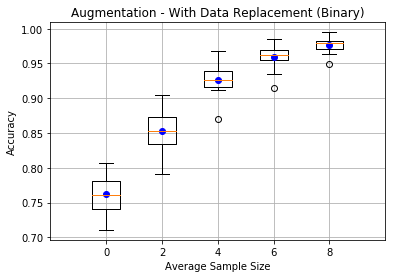

In [11]:
plt.grid(True)
plt.boxplot(acc_augment.transpose(0,2,1)[0], positions = [0,1,2,3,4])
plt.plot(acc_with_repl, 'bo')
plt.xlim((-1,5))
plt.xlabel('Average Sample Size')
plt.ylabel('Accuracy')
plt.title('Augmentation - With Data Replacement (Binary)')
plt.xticks(np.arange(5), (2*np.arange(5)))
plt.show()

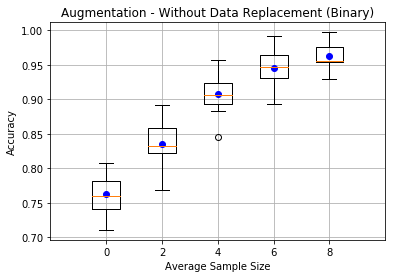

In [12]:
acc_without_repl = []
#acc_with_repl.append(acc_main_mean)
acc_without_repl.extend([i[1] for i in acc_augment_mean])
plt.grid(True)
plt.boxplot(acc_augment.transpose(0,2,1)[1], positions = [0,1,2,3,4])
plt.plot(acc_without_repl, 'bo')
plt.xlabel('Average Sample Size')
plt.ylabel('Accuracy')
plt.title('Augmentation - Without Data Replacement (Binary)')
plt.xlim((-1,5))
plt.xticks(np.arange(5), (2*np.arange(5)))
plt.show()

In [34]:
acc_channel_wise_aug = np.load('acc_channel_wise_aug_binary.npy')
acc_channel_wise = np.load('acc_channel_wise_binary.npy')

In [35]:
acc_channel_wise.shape , acc_channel_wise_aug.shape

((10, 124), (10, 124, 4, 2))

In [36]:
acc_channel_wise_mean = np.mean(acc_channel_wise,axis=0)
acc_channel_wise_aug_mean = np.mean(acc_channel_wise_aug,axis=0)
acc_channel_wise_aug_mean.shape

(124, 4, 2)

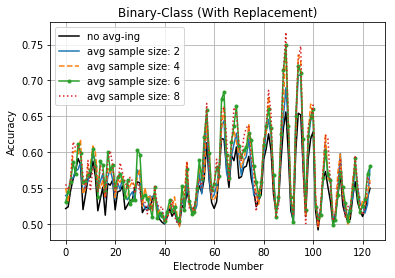

In [37]:
plt.figure()
plt.plot(acc_channel_wise_mean, 'k', label = 'no avg-ing')
acc_channel_wise_aug_mean_t = acc_channel_wise_aug_mean.transpose(2,1,0)
s = ['-','--','.-',':']
for i in range(4):
    plt.plot(acc_channel_wise_aug_mean_t[0][i], s[i],label = 'avg sample size: '+str(2*(i+1)))
plt.legend(loc = 'best')
plt.grid(True)
plt.xlabel('Electrode Number')
plt.ylabel('Accuracy')
plt.title('Binary-Class (With Replacement)')
plt.show()

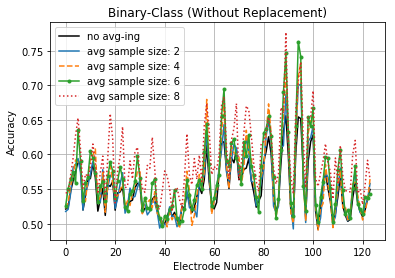

In [38]:
plt.figure()
plt.plot(acc_channel_wise_mean, 'k', label = 'no avg-ing')
acc_channel_wise_aug_mean_t = acc_channel_wise_aug_mean.transpose(2,1,0)
s = ['-','--','.-',':']
for i in range(4):
    plt.plot(acc_channel_wise_aug_mean_t[1][i], s[i],label = 'avg sample size: '+str(2*(i+1)))
plt.legend(loc = 'best')
plt.grid(True)
plt.xlabel('Electrode Number')
plt.ylabel('Accuracy')
plt.title('Binary-Class (Without Replacement)')
plt.show()

In [130]:
dic = {'a':1 , 'b':2}

In [131]:
dic.values()

dict_values([1, 2])

In [28]:
acc_time_wise_aug = np.load('acc_time_wise_aug_binary.npy')
acc_time_wise = np.load('acc_time_wise_binary.npy')

In [29]:
acc_time_wise.shape

(10, 32)

In [30]:
acc_time_wise_mean = np.mean(acc_time_wise,axis=0)
acc_time_wise_aug_mean = np.mean(acc_time_wise_aug,axis=0)
acc_time_wise_aug_mean.shape

(32, 4, 2)

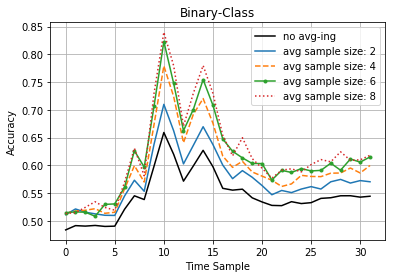

In [31]:
plt.figure()
plt.plot(acc_time_wise_mean, 'k', label = 'no avg-ing')
acc_time_wise_aug_mean_t = acc_time_wise_aug_mean.transpose(2,1,0)
s = ['-','--','.-',':']
for i in range(4):
    plt.plot(acc_time_wise_aug_mean_t[0][i], s[i],label = 'avg sample size: '+str(2*(i+1)))
plt.legend(loc = 'best')
plt.grid(True)
plt.xlabel('Time Sample')
plt.ylabel('Accuracy')
plt.title('Binary-Class')
plt.show()